## ML.ai Week 2 - Data Visualization in Python

Goal: Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

In [2]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from matplotlib import rcParams

sns.set()

%matplotlib inline


# import the data
df = pd.read_csv("C:/Users/bbiesbro/Python Projects Kaggle/ML.ai/Week 2/Data/cardio_train.csv", sep = ';') 

### Data Description

![](data_dic.png)

There are 3 types of input features:

Objective: factual information

Examination: results of medical examination

Subjective: information given by the patient

### EDA

In [3]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df['years'] = (df['age'] / 365).round().astype(int)

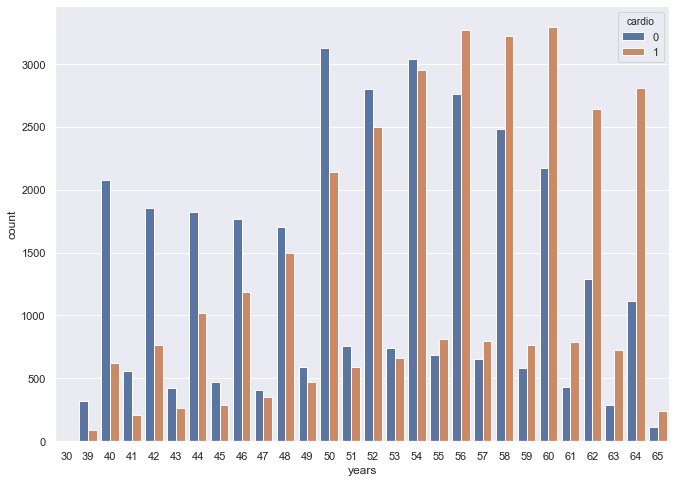

In [10]:
#plot age/cardio
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years', data=df, hue= 'cardio')

In [11]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


### Questions

**Question 1.1 How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.**

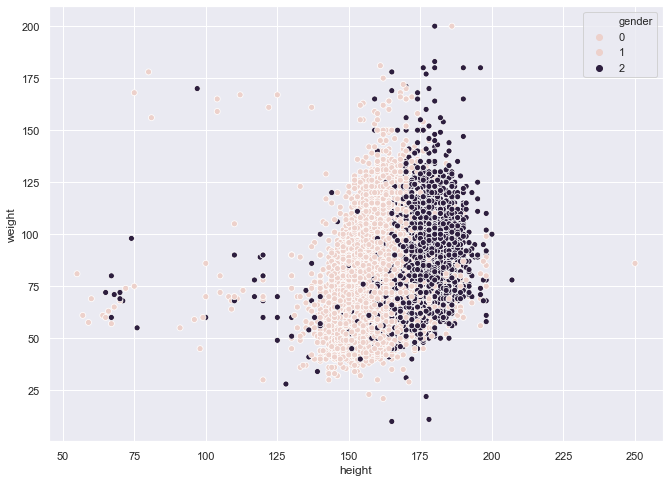

In [13]:
sns.scatterplot(x='height', y='weight', hue='gender', data=df)

Weight is relatively similar, but height is much heiger when gender==2. Thus, it is assumed males have gender==2 and females have gender==1.

In [14]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Conclude that there are 24 470 men, 45 530 women.

**Question 1.2. Which gender more often reports consuming alcohol - men or women?**

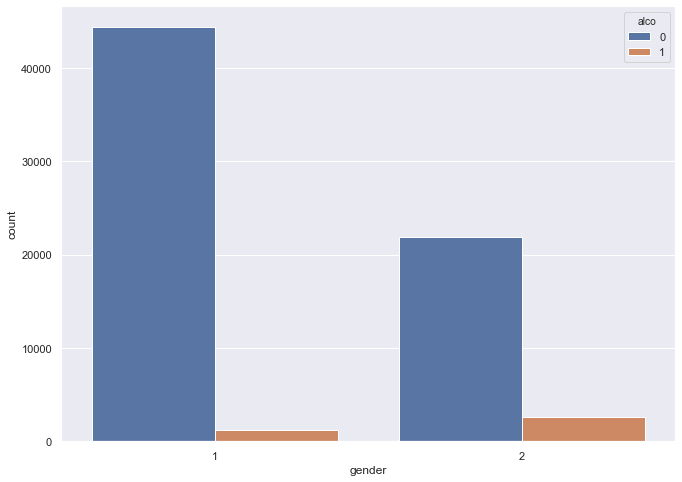

In [15]:
sns.countplot(x='gender', hue='alco', data=df)

Men (gender=2) report drinking more than women.

**Question 1.3. What is the difference between the percentages of smokers among men and women (rounded)?**

In [ ]:
sns.countplot(x='gender', hue='smoke', data=df)

In [ ]:
df[df['gender']==1]['smoke'].value_counts(normalize=True)

In [ ]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]

In [ ]:
df[df['gender']==2]['smoke'].value_counts(normalize=True)

In [17]:
per_dif = round(0.982144-0.78112,2)*100
per_dif

20.0

**Question 1.4. What's the rounded difference between median values of age (in months) for smokers and non-smokers? You'll need to figure out the units of feature age in this dataset.**

In [40]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

![](EHBPS.png)

We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

**Question 1.5. Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?**

In [18]:
old = df[(df['years']>=60) & (df['years']<65)]
old.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0,62
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60


In [19]:
old['cholesterol'] = old['cholesterol'].map({1:4,2:6,3:8})

C:\Users\bbiesbro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
old.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
5,8,21914,1,151,67.0,120,80,6,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,8,1,0,0,1,0,61
7,12,22584,2,178,95.0,130,90,8,3,0,0,1,1,62
10,15,22530,1,169,80.0,120,80,4,1,0,0,1,0,62
19,29,21755,2,162,56.0,120,70,4,1,1,0,1,0,60
22,32,23046,1,158,90.0,145,85,6,2,0,0,1,1,63
23,33,23376,2,156,45.0,110,60,4,1,0,0,1,0,64
31,43,23186,1,169,71.0,140,90,8,1,0,0,1,1,64
34,46,21940,2,173,82.0,140,90,8,1,0,0,0,1,60
38,52,23388,2,162,72.0,130,80,4,1,1,0,1,1,64


In [21]:
old[old['ap_hi']<120]['cardio'].value_counts(normalize=True)

0    0.554857
1    0.445143
Name: cardio, dtype: float64

In [22]:
old[(old['ap_hi']>=160) & (old['ap_hi'] < 180)]['cardio'].value_counts(normalize=True)

1    0.856685
0    0.143315
Name: cardio, dtype: float64

1 is indicated as having cardiovascular disease. For people with a sistolic blood pressure under 120, 44% have cvd. For people with sistolic blood pressure between 160 and 180, 86% have cvd. That is almost double!

**Question 1.6. Choose the correct statements:**
1. Median BMI in the sample is within the range of normal BMI values.
2. The BMI for women is on average higher than for men.
3. Healthy people have, on average, a higher BMI than the people with CVD.
4. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

In [23]:
df['height_m']= 0.01*df['height']

In [24]:
df['BMI'] = round(df['weight']/np.square(df['height_m']),2)

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,height_m,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,1.65,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,1.56,23.01


Normal BMI values are between 18.5 and 25.

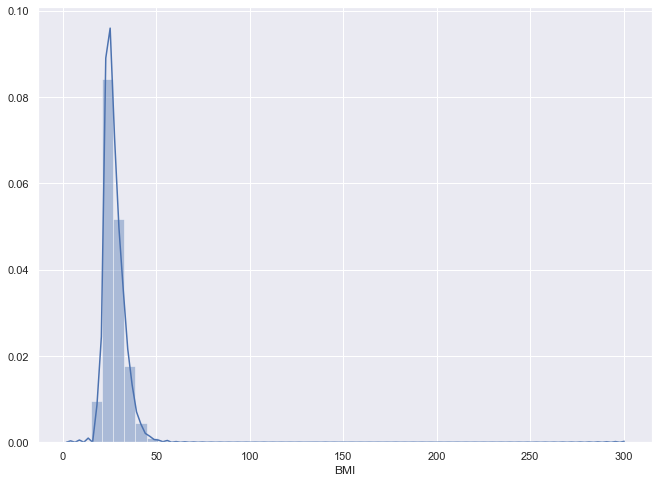

In [26]:
sns.distplot(df['BMI'])

In [27]:
df[df['BMI']>100]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,height_m,BMI
6153,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,58,1.22,108.17
7598,10843,14661,2,70,72.0,120,8,1,1,0,0,1,0,40,0.70,146.94
8171,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,48,0.97,180.68
12770,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,54,0.75,298.67
13265,18928,22456,2,71,68.0,120,80,3,1,0,0,1,0,62,0.71,134.89
14323,20459,22005,1,67,57.0,120,90,1,1,0,0,1,1,60,0.67,126.98
15167,21686,15812,1,70,68.0,120,80,1,1,0,0,0,0,43,0.70,138.78
15366,21958,17405,1,125,167.0,180,90,1,2,0,0,1,1,48,1.25,106.88
16699,23859,19680,2,74,98.0,140,90,1,1,0,0,1,1,54,0.74,178.96
20028,28605,19777,1,112,167.0,180,120,1,1,0,1,1,0,54,1.12,133.13


Above 40 is in the obese range, but there are people with >100 BMI!

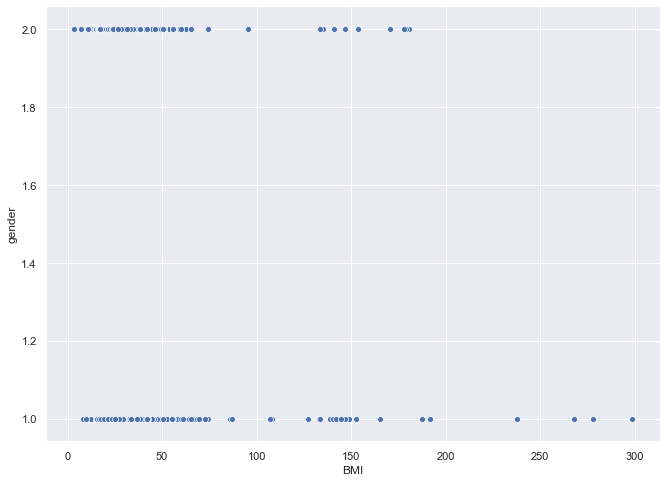

In [28]:
sns.scatterplot(x='BMI', y='gender', data=df)

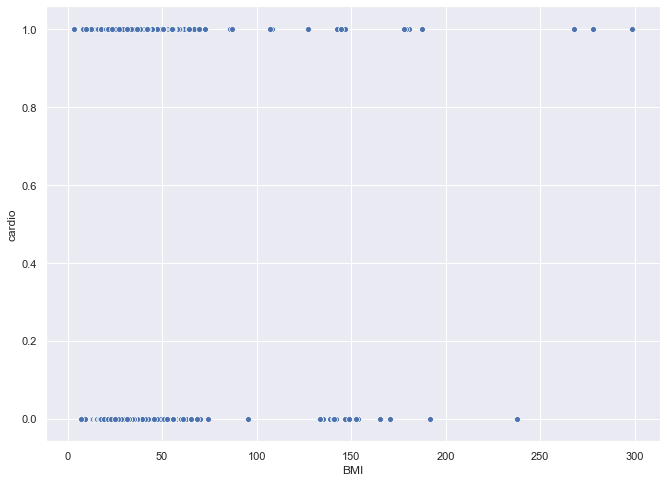

In [29]:
sns.scatterplot(x='BMI', y='cardio', data=df)

### Cleaning the data

Filter out the following patient segments (we consider these as erroneous data):

1) diastolic pressure is higher than systolic

2) height is strictly less than 2.5 percentile 

3) height is strictly more than 97.5 percentile

4) weight is strictly less than 2.5 percentile

5) weight is strictly more than 97.5 percentile

In [30]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


**Question 2.1. Which pair of features has the strongest Pearson's correlation with the gender feature?**

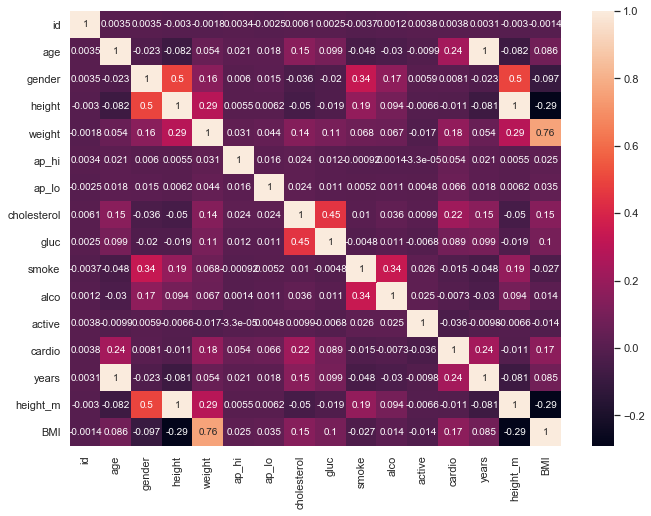

In [36]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

Height and smoke and most strongly correlated with gender.

**Question 2.2. Which pair of features has the strongest Spearman correlation?**

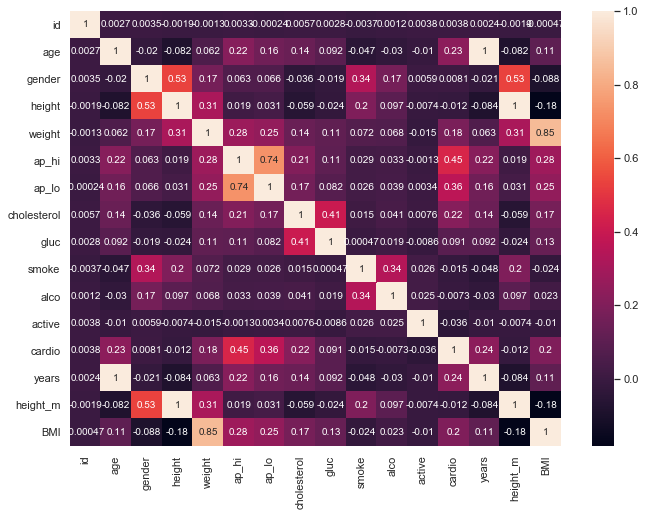

In [37]:
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True)

Ap_hi, Ap_lo are the heighest correlated apart from BMI & weight (but that's because the calculation of BMI partly depends on weight)

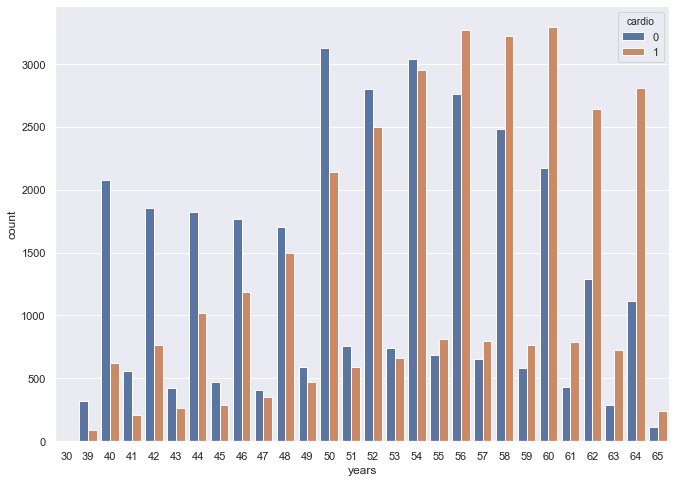

In [39]:
sns.countplot(x='years',hue='cardio', data=df)